# Aula Estatística 2

In [48]:
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy import median
import pandas as pd
#import chart_studio.plotly as py
import plotly.figure_factory as ff
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import warnings, sys, os, fnmatch
from scipy.stats import kurtosis, skew, mode


In [78]:

wet = pd.read_csv('temperature.csv')
wet = wet.iloc[:,6].dropna()

# Source:  Sokal, R.R. and F.J. Rohlf, 1968. Biometry, 
# Freeman Publishing Co., p 109.  Original data from Sokal, 
# R.R. and P.E. Hunter. 1955. A morphometric analysis of DDT-resistant 
# and non-resistant housefly strains Ann. Entomol. Soc. Amer. 48: 499-507.

fly = pd.read_csv('housefly.csv')

current_df = wet

print('moda = ',mode(current_df))
print('mediana = ',median(current_df))

moda =  ModeResult(mode=array([290.15]), count=array([98]))
mediana =  290.11875


In [79]:
current_df.describe()

count    45252.000000
mean       290.215044
std          5.889992
min        265.783333
25%        286.254750
50%        290.118750
75%        294.107542
max        313.360000
Name: San Diego, dtype: float64

## Distribuição normal

In [60]:
current_df = pd.DataFrame(np.random.normal(0, 0.1, 100),columns = ['values'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f534a709a90>]],
      dtype=object)

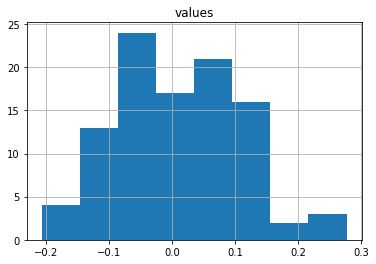

In [66]:
current_df.hist(bins=8)

# Curtose e assimetria

A curtose (kurtosis) está associada ao achatamento da distribuição.

* Platicúrtica: < 0.
* Mesocúrtica: = 0.
* Leptocúrtica: > 0.

Uma Distribuição é Simétrica quando seus valores de Média, Mediana e Moda coincidem. A comparação entre o valor da Média e o valor da Moda, dá, portanto, uma indicação da inclinação da distribuição (skewness).

* Distribuição assimétrica à esquerda ou assimétrica negativa (left skewed ou negative skewed):média < mediana < moda.
* Distribuição assimétrica à direita ou assimétrica positiva (right skewed ou positive skewed): média > mediana > moda.

In [67]:
print(kurtosis(current_df))
print(skew(current_df))

[-0.23328203]
[0.29990373]


# Gráfico quantil-quantil

![](https://miro.medium.com/max/475/0*EfnZXzw3KDz-HN19.png)



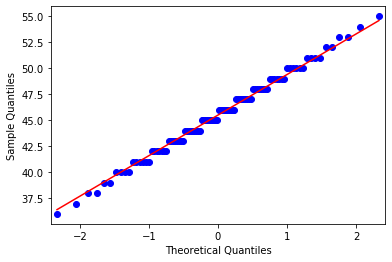

In [41]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(current_df, line='s').gca().lines
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


iplot(fig, filename='normality-QQ')

# Teste Shapiro-Wilk 

O teste de Shapiro-Wilk testa a hipótese nula que uma amostra retirada de uma população, tem distribuição normal. 


Valor-p (também chamado de nível descritivo ou probabilidade de significância, é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%. Assim, uma outra interpretação para o valor-p, é que este é o menor nível de significância com que se rejeitaria a hipótese nula. Em termos gerais, um valor-p pequeno significa que a probabilidade de obter um valor da estatística de teste como o observado é muito improvável, levando assim à rejeição da hipótese nula.

Em um teste clássico de hipóteses, são definidas duas hipóteses, a nula (H0) e a alternativa (HA). Em muitas aplicações da estatística, convenciona-se definir a hipótese alternativa como a hipótese formulada pelo pesquisador, enquanto a hipótese nula é o seu complemento. A princípio, a hipótese nula é considerada a verdadeira. Ao confrontarmos a hipótese nula com os achados de uma amostra aleatória tomada de uma população de interesse, verifica-se a sua plausibilidade em termos probabilísticos, o que nos leva a rejeitarmos ou não H0. Se não rejeitamos H0, tomamo-la como verdadeira; caso contrário, tomamos HA como verdadeira.

No entanto, por utilizarmos nesta tomada de decisão uma amostra (uma parte da população) e não a população inteira, podemos cometer dois tipos de erro. Cometemos um erro tipo I quando rejeitamos H0 e H0 é verdadeira, e cometemos um erro tipo II quando não rejeitamos H0 e H0 é falsa. A tabela abaixo descreve estas situações.

In [95]:
from scipy.stats import shapiro
stat, p = shapiro(current_df)

# interpret
alpha = 0.05
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)


/home/jfialho/.conda/envs/ml_default/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



# Teste D'Agostino K2

Testa a hipótese nula que uma amostra retirada de uma população, tem distribuição normal (Utiliza Curtose e Skew). 

In [94]:
from scipy.stats import normaltest

stat, p = normaltest(current_df)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(current_df), stat, p, msg]
]

normt_table = ff.create_table(result_mat)
normt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
normt_table['layout']['height']=200
normt_table['layout']['margin']['t']=50
normt_table['layout']['margin']['b']=50

iplot(normt_table, filename="D'Agostino-test-table")

# Correlação

É qualquer relação estatística (causal ou não causal) entre duas variáveis.


A correlação é sempre um valor entre -1 e 1.

 

* Quando é -1 diz-se que a correlação perfeita e negativa.
* Quando é 1, é perfeita e positiva.
* Quando é zero, não há correlação.  
* Correlações baixas (por exemplo, 0,3) são correlações fracas.

In [82]:
pokemon = pd.read_csv('pokemon.csv')

In [85]:
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f534a5d3050>]],
      dtype=object)

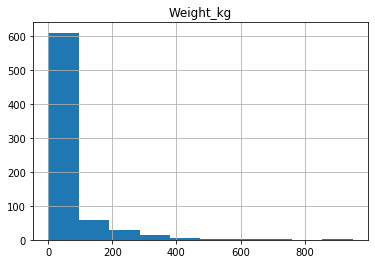

In [86]:
pokemon.hist(column="Weight_kg")

In [92]:
pokemon['Pr_Male'].corr(pokemon["Height_m"])

0.040863020692765845

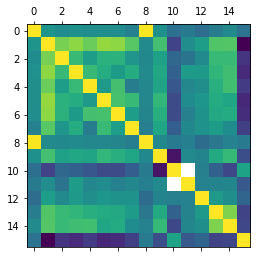

In [89]:
import matplotlib.pyplot as plt

plt.matshow(pokemon.corr())
plt.show()

In [93]:
pokemon.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


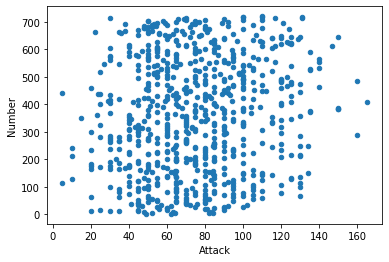

In [97]:
pokemon.plot.scatter(x='Attack', y='Number')

In [100]:
import plotly.express as px
fig = px.scatter(pokemon, x='Attack')
fig.show()